In [9]:
import nltk
import csv
import ssl ## workaround for my specific authorization issue
import pandas as pd
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.stem.porter import PorterStemmer

try:
    _create_unverified_https_context = ssl._create_unverified_context
except AttributeError:
    pass
else:
    ssl._create_default_https_context = _create_unverified_https_context

DATA_PATH = 'out.csv'
nltk.download('stopwords')
nltk.download('wordnet')

df = pd.read_csv(DATA_PATH)
####### FOR TESTING ONLY ###########

# df = df.head(100)

####### DROP USELESS COLUMNS  ###########
df = df.drop('review_id', axis=1)
df = df.drop('business_id', axis=1)
df = df.drop('funny', axis=1)
df = df.drop('cool', axis=1)
df = df.drop('date', axis=1)
####### LOWERCASE  ###########
df['text-lowered'] = df['text'].str.lower()
####### TOKENIZATION  ###########
df['tokenized_text'] = df['text-lowered'].apply(word_tokenize)
df = df.drop('text-lowered', axis=1)
####### STOPWORDS REMOVAL  ###########
stop = stopwords.words('english')
df['tokenized_text'] = df['tokenized_text'].apply(lambda x: [item for item in x if item not in stop])
####### STEMMING  ###########
stemmer = PorterStemmer()
df['tokenized_text'] = df['tokenized_text'].apply(lambda x: [stemmer.stem(y) for y in x])
####### Lemmatizating  ###########
lmtzr = WordNetLemmatizer()
df['tokenized_text'] = df['tokenized_text'].apply(lambda x: [lmtzr.lemmatize(y) for y in x])
######## LISTS JOIN AS SINGLE STRING ############
df['tokenized_text_string'] = [' '.join(map(str, l)) for l in df['tokenized_text']]
### POLARITY ###
from nltk.sentiment.vader import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')
analyzer = SentimentIntensityAnalyzer()
df['compound'] = [analyzer.polarity_scores(x)['compound'] for x in df['tokenized_text_string']]
df['neg'] = [analyzer.polarity_scores(x)['neg'] for x in df['tokenized_text_string']]
df['neu'] = [analyzer.polarity_scores(x)['neu'] for x in df['tokenized_text_string']]
df['pos'] = [analyzer.polarity_scores(x)['pos'] for x in df['tokenized_text_string']]
##########################


[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/royqiu/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /Users/royqiu/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/royqiu/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [10]:
from rake_nltk import Rake
def star_revised_logic(x):
    if x == 3:
        return 0
    elif x>3:
        return 1
    else:
        return -1
r = Rake()
r.extract_keywords_from_text(df['tokenized_text_string'][0])
structure = r.get_ranked_phrases()[0:10]
df['star_revised'] = df['stars'].apply(lambda x: star_revised_logic(x))

In [12]:
df.head()

,user_id,stars,useful,text,tokenized_text,tokenized_text_string,compound,neg,neu,pos,star_revised
0,ak0TdVmGKo4pwqdJSTLwWw,4,3,Apparently Prides Osteria had a rough summer a...,"[appar, pride, osteria, rough, summer, evidenc...",appar pride osteria rough summer evidenc almos...,0.9674,0.000,0.873,0.127,1
1,YoVfDbnISlW0f7abNQACIg,4,1,This store is pretty good. Not as great as Wal...,"[store, pretti, good, ., great, walmart, (, pr...","store pretti good . great walmart ( prefer , m...",0.9884,0.000,0.601,0.399,1
2,eC5evKn1TWDyHCyQAwguUw,5,0,I called WVM on the recommendation of a couple...,"[call, wvm, recommend, coupl, friend, use, pas...",call wvm recommend coupl friend use past thoug...,0.9712,0.000,0.669,0.331,1
3,SFQ1jcnGguO0LYWnbbftAA,2,1,I've stayed at many Marriott and Renaissance M...,"['ve, stay, mani, marriott, renaiss, marriott,...",'ve stay mani marriott renaiss marriott 's hug...,0.8805,0.058,0.644,0.298,-1
4,0kA0PAJ8QFMeveQWHFqz2A,4,0,The food is always great here. The service fro...,"[food, alway, great, ., servic, manag, well, s...",food alway great . servic manag well staff sup...,0.9359,0.000,0.476,0.524,1


In [14]:
compression_opts = dict(method='zip', archive_name='out.csv')
df.to_csv('0423.zip', index=False, compression=compression_opts)

## TF-IDF

In [187]:
from sklearn.feature_extraction.text import TfidfVectorizer

sentences = df["tokenized_text_string"]
# sentences = cleaned_df["text"]

vectorizer = TfidfVectorizer(norm = False, smooth_idf = False, min_df=0.04)
df["tfidf_vectors"] = vectorizer.fit_transform(sentences)
# print(sentence_vectors.toarray())
# df["tfidf_vectors"]

In [ ]:
# 0.05 对应174列，0.04对应226列

In [186]:
# print(df["tfidf_vectors"][0])
df["tfidf_vectors"][1]

<200000x174 sparse matrix of type '<class 'numpy.float64'>'
	with 3587919 stored elements in Compressed Sparse Row format>

In [188]:
dd = vectorizer.fit_transform(sentences)
ddf =pd.DataFrame(dd.todense())
ddf

,0,1,2,3,4,5,6,7,8,9,...,216,217,218,219,220,221,222,223,224,225
0,0.000000,0.00000,0.0,8.207300,0.000000,0.0,0.000000,0.0,0.000000,0.000000,...,0.000000,0.0,0.000000,0.0,4.108117,0.0,0.000000,0.0,2.495061,0.0
1,0.000000,0.00000,0.0,0.000000,0.000000,0.0,0.000000,0.0,7.057592,0.000000,...,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0
2,0.000000,0.00000,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,...,0.000000,0.0,0.000000,0.0,0.000000,0.0,3.177716,0.0,0.000000,0.0
3,0.000000,0.00000,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,...,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0
4,0.000000,0.00000,0.0,0.000000,3.123435,0.0,0.000000,0.0,0.000000,0.000000,...,0.000000,0.0,2.920696,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199995,0.000000,0.00000,0.0,0.000000,0.000000,0.0,3.656336,0.0,0.000000,0.000000,...,0.000000,0.0,0.000000,0.0,0.000000,0.0,9.533148,0.0,0.000000,0.0
199996,0.000000,0.00000,0.0,2.735767,0.000000,0.0,0.000000,0.0,0.000000,0.000000,...,0.000000,0.0,11.682783,0.0,0.000000,0.0,3.177716,0.0,2.495061,0.0
199997,0.000000,0.00000,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,...,3.302835,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,2.495061,0.0
199998,0.000000,0.00000,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,...,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0


## Hashing Vectorizer

In [148]:
from sklearn.feature_extraction.text import HashingVectorizer

sentences = df["tokenized_text_string"]

vectorizer = HashingVectorizer(norm = None, n_features = 100)
df["hashing_vectors"] = vectorizer.fit_transform(sentences)
# print(sentence_vectors.toarray())


In [149]:
# print(df["hashing_vectors"][1])

In [150]:
dd = vectorizer.fit_transform(sentences)

In [151]:
ddh =pd.DataFrame(dd.todense())
ddh

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,0.0,-2.0,0.0,2.0,-2.0,0.0,2.0,1.0,-1.0,0.0,...,-1.0,1.0,0.0,-1.0,2.0,1.0,1.0,-1.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,-1.0,0.0,0.0,0.0,-1.0,0.0,0.0,0.0,-1.0
2,0.0,0.0,-1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,-1.0,0.0,2.0,1.0,-1.0,0.0,-2.0,1.0,0.0
3,0.0,0.0,0.0,0.0,0.0,-1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,-1.0,-1.0,-1.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199995,-1.0,0.0,-1.0,1.0,2.0,0.0,0.0,-3.0,0.0,-2.0,...,-1.0,0.0,0.0,5.0,1.0,1.0,0.0,0.0,0.0,4.0
199996,1.0,-1.0,0.0,0.0,0.0,-3.0,0.0,1.0,-1.0,-1.0,...,1.0,4.0,0.0,1.0,-1.0,-1.0,0.0,0.0,1.0,0.0
199997,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,-1.0,0.0,1.0,-1.0,0.0,-1.0,0.0
199998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [152]:
ml = df[["stars","compound","neg","neu","pos","star_revised"]]
ml.head()

,stars,compound,neg,neu,pos,star_revised
0,4,0.9674,0.000,0.873,0.127,1
1,4,0.9884,0.000,0.601,0.399,1
2,5,0.9712,0.000,0.669,0.331,1
3,2,0.8805,0.058,0.644,0.298,-1
4,4,0.9359,0.000,0.476,0.524,1


In [189]:
complete_df = pd.concat([ml, ddf, ddh], axis=1)
complete_df

,stars,compound,neg,neu,pos,star_revised,0,1,2,3,...,90,91,92,93,94,95,96,97,98,99
0,4,0.9674,0.000,0.873,0.127,1,0.000000,0.00000,0.0,8.207300,...,-1.0,1.0,0.0,-1.0,2.0,1.0,1.0,-1.0,0.0,0.0
1,4,0.9884,0.000,0.601,0.399,1,0.000000,0.00000,0.0,0.000000,...,0.0,-1.0,0.0,0.0,0.0,-1.0,0.0,0.0,0.0,-1.0
2,5,0.9712,0.000,0.669,0.331,1,0.000000,0.00000,0.0,0.000000,...,0.0,-1.0,0.0,2.0,1.0,-1.0,0.0,-2.0,1.0,0.0
3,2,0.8805,0.058,0.644,0.298,-1,0.000000,0.00000,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,-1.0,-1.0,-1.0
4,4,0.9359,0.000,0.476,0.524,1,0.000000,0.00000,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199995,1,-0.8750,0.208,0.698,0.094,-1,0.000000,0.00000,0.0,0.000000,...,-1.0,0.0,0.0,5.0,1.0,1.0,0.0,0.0,0.0,4.0
199996,3,0.9871,0.014,0.735,0.250,0,0.000000,0.00000,0.0,2.735767,...,1.0,4.0,0.0,1.0,-1.0,-1.0,0.0,0.0,1.0,0.0
199997,3,0.7845,0.047,0.742,0.210,0,0.000000,0.00000,0.0,0.000000,...,0.0,0.0,0.0,-1.0,0.0,1.0,-1.0,0.0,-1.0,0.0
199998,5,0.5093,0.000,0.708,0.292,1,0.000000,0.00000,0.0,0.000000,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [190]:
df_balanced = pd.concat([complete_df[df["stars"]==5].sample(5000), complete_df[df["stars"]==4].sample(5000), \
                         complete_df[df["stars"]==3].sample(10000), complete_df[df["stars"]==2].sample(5000), \
                         complete_df[df["stars"]==1].sample(5000)], axis=0)

In [191]:
complete_df = df_balanced.sample(10000)
complete_df

,stars,compound,neg,neu,pos,star_revised,0,1,2,3,...,90,91,92,93,94,95,96,97,98,99
133417,1,0.0000,0.000,1.000,0.000,-1,0.0,0.0,0.000000,0.000000,...,0.0,-1.0,0.0,-1.0,0.0,0.0,-1.0,0.0,0.0,-1.0
2549,3,0.4404,0.000,0.818,0.182,0,0.0,0.0,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,0.0
180259,4,0.9786,0.000,0.801,0.199,1,0.0,0.0,0.000000,2.735767,...,0.0,-1.0,1.0,-1.0,1.0,-1.0,0.0,-1.0,0.0,0.0
8588,2,0.2732,0.094,0.755,0.151,-1,0.0,0.0,0.000000,0.000000,...,0.0,1.0,0.0,0.0,-1.0,2.0,1.0,0.0,0.0,0.0
58975,2,0.8074,0.051,0.854,0.095,-1,0.0,0.0,0.000000,5.471533,...,-1.0,-1.0,0.0,2.0,-1.0,1.0,0.0,-1.0,-2.0,-1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40137,2,-0.3875,0.180,0.820,0.000,-1,0.0,0.0,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
100802,5,0.7523,0.155,0.598,0.247,1,0.0,0.0,0.000000,0.000000,...,2.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,-1.0,0.0
60885,1,0.7096,0.084,0.701,0.216,-1,0.0,0.0,3.895706,0.000000,...,0.0,-2.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0
30059,5,0.9612,0.000,0.541,0.459,1,0.0,0.0,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0


In [40]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, mean_squared_error
from sklearn.preprocessing import MinMaxScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, mean_squared_error
from sklearn.model_selection import train_test_split

0.7283888888888889


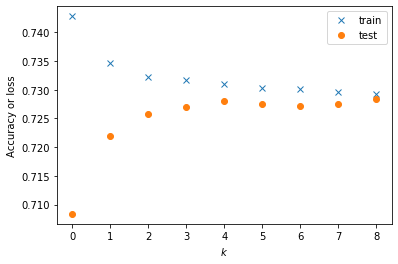

In [51]:
X = ml[["compound","neg","neu","pos"]]
# y = ml["stars"]
y = ml["star_revised"]

X_train, X_final_test, y_train, y_final_test = train_test_split(X, y, test_size=0.1, shuffle = True, random_state=123)

X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.2, shuffle = True, random_state=123)

scaler = MinMaxScaler().fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Try differetn K

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

acc_train = []
acc_test  = []

# train_losses = []
# test_losses = []

for i in range(10,100,10):
    model = KNeighborsClassifier(i)
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    acc_test.append(accuracy_score(y_pred,y_test))
    y_pred = model.predict(X_train_scaled)
    acc_train.append(accuracy_score(y_pred,y_train))
    
#     train_loss = log_loss(y_train,model.predict_proba(X_train_scaled))
#     test_loss = log_loss(y_test,model.predict_proba(X_test_scaled))
#     train_losses.append(train_loss)
#     test_losses.append(test_loss)

from matplotlib import pyplot as plt
%matplotlib inline

plt.plot(acc_train,'x',label="train");
plt.plot(acc_test,'o',label="test");

# plt.plot(train_losses,'x',label="train_loss");
# plt.plot(test_losses,'o',label="test_loss");

plt.xlabel('$k$'); plt.ylabel('Accuracy or loss')
plt.legend();
print(max(acc_test))

In [53]:
from sklearn import svm
clf = svm.SVC(decision_function_shape = 'ovo', kernel = 'rbf')
clf.fit(X_train_scaled, y_train)

y_pred = clf.predict(X_test_scaled)
acc_test = (accuracy_score(y_pred,y_test))
y_pred = clf.predict(X_train_scaled)
acc_train = (accuracy_score(y_pred,y_train))
print('kernel = rbf')
print('train accuracy: {}'.format(acc_train))
print('test accuracy: {}'.format(acc_test))

kernel = rbf
train accuracy: 0.7208263888888888
test accuracy: 0.7219444444444445


## 10000行数据 默认svm，加上tf-idf和hash

In [196]:
X = pd.concat([complete_df[["compound","neg","neu","pos"]], complete_df.iloc[:,6:]], axis=1)
# X = X.sample(10000)
y = complete_df["star_revised"]
# y = y.sample(10000)

X_train, X_final_test, y_train, y_final_test = train_test_split(X, y, test_size=0.1, shuffle = True, random_state=123)

X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.2, shuffle = True, random_state=123)

scaler = MinMaxScaler().fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [197]:
from sklearn import svm
clf1 = svm.SVC()
clf1.fit(X_train_scaled, y_train)

y_pred = clf1.predict(X_test_scaled)
acc_test = (accuracy_score(y_pred,y_test))
y_pred = clf1.predict(X_train_scaled)
acc_train = (accuracy_score(y_pred,y_train))
# print('kernel = rbf')
print('train accuracy: {}'.format(acc_train))
print('test accuracy: {}'.format(acc_test))

train accuracy: 0.6684722222222222
test accuracy: 0.6383333333333333


In [198]:
y_test = clf1.predict(scaler.transform(X_final_test))
acc_test = accuracy_score(y_test,y_final_test)
acc_test

0.66

# 看上面

In [192]:
X = complete_df[["compound","neg","neu","pos"]]
# X = X.head(10000)
y = complete_df["star_revised"]
# y = y.head(10000)

X_train, X_final_test, y_train, y_final_test = train_test_split(X, y, test_size=0.1, shuffle = True, random_state=123)

X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.2, shuffle = True, random_state=123)

scaler = MinMaxScaler().fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

from sklearn import svm
clf = svm.SVC()
clf.fit(X_train_scaled, y_train)

y_pred = clf.predict(X_test_scaled)
acc_test = (accuracy_score(y_pred,y_test))
y_pred = clf.predict(X_train_scaled)
acc_train = (accuracy_score(y_pred,y_train))
# print('kernel = rbf')
print('train accuracy: {}'.format(acc_train))
print('test accuracy: {}'.format(acc_test))

train accuracy: 0.5269444444444444
test accuracy: 0.5072222222222222


In [193]:
y_test = clf.predict(scaler.transform(X_final_test))
acc_test = (accuracy_score(y_test,y_final_test))
acc_test

0.54

## 只有TF-IDF和Hashing

In [194]:
X = complete_df.iloc[:,6:]
# X = X.sample(10000)
y = complete_df["star_revised"]
# y = y.sample(10000)

X_train, X_final_test, y_train, y_final_test = train_test_split(X, y, test_size=0.1, shuffle = True, random_state=123)

X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.2, shuffle = True, random_state=123)

scaler = MinMaxScaler().fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

from sklearn import svm
clf2 = svm.SVC()
clf2.fit(X_train_scaled, y_train)

y_pred = clf2.predict(X_test_scaled)
acc_test = (accuracy_score(y_pred,y_test))
y_pred = clf2.predict(X_train_scaled)
acc_train = (accuracy_score(y_pred,y_train))
# print('kernel = rbf')
print('train accuracy: {}'.format(acc_train))
print('test accuracy: {}'.format(acc_test))

train accuracy: 0.6829166666666666
test accuracy: 0.6405555555555555


In [195]:
y_test = clf2.predict(scaler.transform(X_final_test))
acc_test = (accuracy_score(y_test,y_final_test))
acc_test

0.645

In [201]:
df.head()

,user_id,stars,useful,text,tokenized_text,tokenized_text_string,compound,neg,neu,pos,star_revised,tfidf_vectors,hashing_vectors
0,ak0TdVmGKo4pwqdJSTLwWw,4,3,Apparently Prides Osteria had a rough summer a...,"[appar, pride, osteria, rough, summer, evidenc...",appar pride osteria rough summer evidenc almos...,0.9674,0.000,0.873,0.127,1,"(0, 220)\t4.108117404148782\n (0, 97)\t3.23...","(0, 1)\t-2.0\n (0, 3)\t2.0\n (0, 4)\t-2.0\..."
1,YoVfDbnISlW0f7abNQACIg,4,1,This store is pretty good. Not as great as Wal...,"[store, pretti, good, ., great, walmart, (, pr...","store pretti good . great walmart ( prefer , m...",0.9884,0.000,0.601,0.399,1,"(0, 220)\t4.108117404148782\n (0, 97)\t3.23...","(0, 1)\t-2.0\n (0, 3)\t2.0\n (0, 4)\t-2.0\..."
2,eC5evKn1TWDyHCyQAwguUw,5,0,I called WVM on the recommendation of a couple...,"[call, wvm, recommend, coupl, friend, use, pas...",call wvm recommend coupl friend use past thoug...,0.9712,0.000,0.669,0.331,1,"(0, 220)\t4.108117404148782\n (0, 97)\t3.23...","(0, 1)\t-2.0\n (0, 3)\t2.0\n (0, 4)\t-2.0\..."
3,SFQ1jcnGguO0LYWnbbftAA,2,1,I've stayed at many Marriott and Renaissance M...,"['ve, stay, mani, marriott, renaiss, marriott,...",'ve stay mani marriott renaiss marriott 's hug...,0.8805,0.058,0.644,0.298,-1,"(0, 220)\t4.108117404148782\n (0, 97)\t3.23...","(0, 1)\t-2.0\n (0, 3)\t2.0\n (0, 4)\t-2.0\..."
4,0kA0PAJ8QFMeveQWHFqz2A,4,0,The food is always great here. The service fro...,"[food, alway, great, ., servic, manag, well, s...",food alway great . servic manag well staff sup...,0.9359,0.000,0.476,0.524,1,"(0, 220)\t4.108117404148782\n (0, 97)\t3.23...","(0, 1)\t-2.0\n (0, 3)\t2.0\n (0, 4)\t-2.0\..."


In [209]:
import numpy as np

In [231]:
from gensim.models import Word2Vec
import time
# Skip-gram model (sg = 1)
size = 1000
window = 3
min_count = 1
workers = 3
sg = 1

word2vec_model_file = 'word2vec_' + str(size) + '.model'
start_time = time.time()
stemmed_tokens = pd.Series(df['tokenized_text']).values
# Train the Word2Vec Model
# w2v_model = Word2Vec(stemmed_tokens, min_count = min_count, size = size, workers = workers, window = window, sg = sg)
w2v_model = Word2Vec(stemmed_tokens, min_count = 1)
print("Time taken to train word2vec model: " + str(time.time() - start_time))
w2v_model.save(word2vec_model_file)

Time taken to train word2vec model: 35.25235414505005


In [238]:
# Load the model from the model file
sg_w2v_model = Word2Vec.load(word2vec_model_file)
# Unique ID of the word
print("Index of the word 'food':")
print(sg_w2v_model.wv.key_to_index["rock"])
# Total number of the words 
print(len(sg_w2v_model.wv))
# Print the size of the word2vec vector for one word
print("Length of the vector generated for a word")
print(len(sg_w2v_model.wv.get_vector("food", norm=True)))
# Get the mean for the vectors for an example review
print("Print the length after taking average of all word vectors in a sentence:")
# print(np.mean([sg_w2v_model[token] for token in df['tokenized_text'][0]], axis=0))
print(np.mean([sg_w2v_model.wv.get_vector(token, norm=True) for token in df['tokenized_text'][11243]], axis=0))

Index of the word 'food':
818
126545
Length of the vector generated for a word
100
Print the length after taking average of all word vectors in a sentence:
[ 0.01007448 -0.04052091 -0.05872015 -0.01603235 -0.0350883   0.03938613
 -0.05542088 -0.01474061  0.10752092  0.09438957  0.02801545  0.03727017
  0.07734784  0.06537879 -0.03884305  0.02910908 -0.06245298  0.00591933
  0.05091715  0.13215415  0.05728447 -0.05393955 -0.02017746  0.04534864
  0.04796229 -0.00668232  0.00220534 -0.01091066 -0.03257614 -0.07687999
  0.04951868  0.05001439 -0.02619114 -0.0049521   0.00688535 -0.00044432
 -0.00613021  0.05798122 -0.05281559  0.04099437  0.04247496  0.05198748
  0.04853902 -0.03741696 -0.01806989 -0.0567378   0.03804617  0.0378163
  0.03765254 -0.0398608   0.01766838  0.00995337 -0.03790987 -0.00532156
  0.05352742 -0.06164405 -0.00973356 -0.04599738  0.00577133  0.02320619
  0.04693506  0.01120891 -0.07323732 -0.0119214   0.02336012 -0.07162546
 -0.00271943  0.00835658  0.08028667 -0.03

In [234]:
xx = np.mean([sg_w2v_model.wv.get_vector(token, norm=True) for token in df['tokenized_text'][2]], axis=0)

In [235]:
type(xx)

numpy.ndarray

In [236]:
len(xx.tolist())

100

In [244]:
# df_test["word2vec"] = np.mean([sg_w2v_model.wv.get_vector(token, norm=True) for token in df['tokenized_text']], axis=0)